## Métodos de Otimização: Métodos Heuristicos

### Enxame de Partículas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Enxame de Partículas' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
nFunc = 34
Qvar = 12
Qtind = 20
kmax = 300
countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
x =np.zeros((Qtind,Qvar) , dtype = 'float')
fHist = []
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

for i in range(0, Qvar):
    xmin[i] = -100; xmax[i] = 100

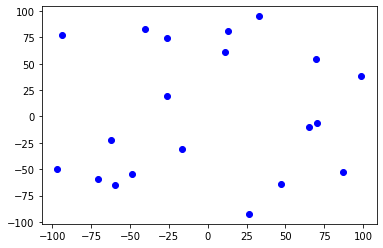

In [4]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = f(pop[i,:],nFunc,Qvar,countFunc)

plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [5]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
print(fbest)

2.472246972211928e+17


In [6]:
x=pop.copy()
layout = "{0:.5f}"
k=0
while k < kmax:
    k += 1
    for i in range(0, Qtind):
        for j in range(0, Qvar):
            r1[j] = random.random()
            r2[j] = random.random()
            x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
            x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

        fsol[i],countFunc = f(x[i,:],nFunc,Qvar,countFunc)
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
    
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    for i in range(0, Qvar):
        print(layout.format(pbest[i]), end =" ")
    print(layout.format(fbest))
    fHist.append(fbest)
    

49.40933 -84.98401 -8.01017 -44.88516 79.83248 -38.67904 -30.54959 15.97035 -16.16399 -85.21097 -84.76260 -71.47366 6916520740332027.00000
52.98527 -75.26760 -27.78656 -44.86985 77.44284 -70.02532 -30.50079 -16.96302 -55.23559 -77.93242 -76.30421 -75.78139 48918757159617.79688
53.89025 -58.66815 -27.52293 -39.74051 73.82210 -91.89295 -30.91534 -42.99440 -50.84288 -84.34246 -66.26676 -72.41083 845855016936.29102
53.62706 -64.12114 -23.35095 -43.95294 72.62872 -100.00000 -32.42989 -42.01989 -57.97233 -84.03206 -70.55262 -70.47256 362641809269.92700
53.77476 -68.49695 -33.06153 -45.91775 66.92171 -99.86466 -30.85802 -54.29390 -68.61825 -82.74961 -78.05919 -71.55652 106478944265.75101
53.76917 -69.18556 -37.40549 -41.18590 68.24565 -99.81478 -30.84250 -55.38224 -69.97193 -81.46503 -80.47928 -70.83918 105810100016.81000
53.82246 -68.53126 -39.97648 -40.79341 62.70467 -99.78401 -31.15184 -62.11624 -69.62029 -81.42359 -80.20069 -70.82284 94502169983.35510
53.87739 -67.61346 2.41352 -36.98665 

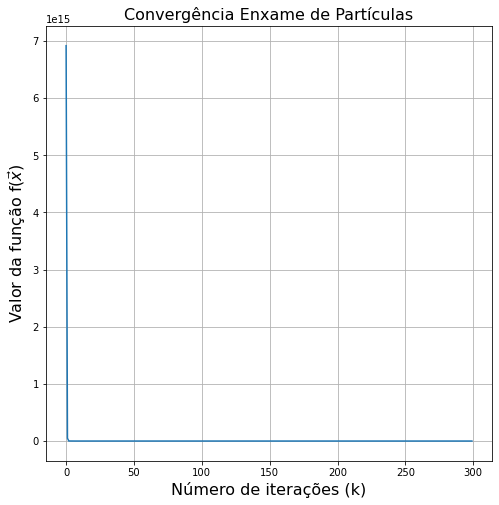

In [7]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [8]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  6020
Tempo de Execução = 115.52664685249329 s
